In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customer=pd.read_csv('Customer.csv')
customer

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [4]:
transactions=pd.read_csv('Transactions.csv')
transactions

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [5]:
Prod_H=pd.read_csv('prod_cat_info.csv')
Prod_H

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [6]:
print(customer.shape)
print(transactions.shape)
print(Prod_H.shape)


(5647, 4)
(23053, 10)
(23, 4)


In [7]:
#1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final.
Customer_1=pd.merge(left=customer,right=transactions,left_on='customer_Id',right_on='cust_id',how='right')
Customer_1.shape

(23053, 14)

In [8]:
print(Customer_1.columns)
print(Prod_H.columns)

Index(['customer_Id', 'DOB', 'Gender', 'city_code', 'transaction_id',
       'cust_id', 'tran_date', 'prod_subcat_code', 'prod_cat_code', 'Qty',
       'Rate', 'Tax', 'total_amt', 'Store_type'],
      dtype='object')
Index(['prod_cat_code', 'prod_cat', 'prod_sub_cat_code', 'prod_subcat'], dtype='object')


In [9]:
#1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final.
Customer_final=pd.merge(left=Customer_1,right=Prod_H,left_on=(['prod_subcat_code','prod_cat_code']),right_on=(['prod_sub_cat_code','prod_cat_code']),how='left')
Customer_final.shape

(23053, 17)

In [11]:
# 2 a) column names and their corresponding data types
Customer_final.dtypes

customer_Id            int64
DOB                   object
Gender                object
city_code            float64
transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object

In [12]:
#2 b) Top 10 observations
Customer_final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,270351,26-09-1981,M,5.0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women
1,270384,11-05-1973,F,8.0,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers
2,273420,27-07-1992,M,8.0,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY
3,271509,08-06-1981,M,3.0,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath
4,273420,27-07-1992,M,8.0,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY
5,272357,09-10-1982,F,6.0,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,8,Personal Appliances
6,273667,29-05-1981,M,9.0,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,11,Bath
7,271489,21-04-1971,M,9.0,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,12,Tools
8,275108,04-11-1971,F,8.0,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,3,Kids
9,269014,27-11-1979,F,3.0,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,8,Personal Appliances


In [13]:
#2 b) Bottom 10 observations
Customer_final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
23043,271982,10-08-1976,M,8.0,49882891062,271982,25-01-2011,10,5,4,1330,558.600,5878.600,e-Shop,Books,10,Non-Fiction
23044,273982,12-10-1991,M,4.0,14787475597,273982,25-01-2011,4,3,5,969,508.725,5353.725,e-Shop,Electronics,4,Mobiles
23045,273031,17-01-1980,F,8.0,50691119572,273031,25-01-2011,6,5,1,1148,120.540,1268.540,TeleShop,Books,6,DIY
23046,272049,28-06-1975,F,6.0,40893803228,272049,25-01-2011,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,11,Bath
23047,266866,18-04-1974,M,4.0,30856003613,266866,25-01-2011,4,2,2,444,93.240,981.240,TeleShop,Footwear,4,Kids
23048,274550,21-02-1972,M,7.0,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,12,Academic
23049,270022,27-04-1984,M,9.0,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,4,Mens
23050,271020,20-06-1976,M,8.0,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,2,Furnishing
23051,270911,22-05-1970,M,2.0,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,11,Children
23052,271961,15-01-1982,M,1.0,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,Books,11,Children


In [14]:
#2 c) Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
Customer_final.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_Id,23053.0,2.710217e+05,2.431692e+03,266783.000,2.689350e+05,2.709800e+05,2.731140e+05,2.752650e+05
city_code,23045.0,5.482534e+00,2.863499e+00,1.000,3.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01
transaction_id,23053.0,5.007348e+10,2.898194e+10,3268991.000,2.493864e+10,5.009313e+10,7.533000e+10,9.998755e+10
cust_id,23053.0,2.710217e+05,2.431692e+03,266783.000,2.689350e+05,2.709800e+05,2.731140e+05,2.752650e+05
prod_subcat_code,23053.0,6.149091e+00,3.726372e+00,1.000,3.000000e+00,5.000000e+00,1.000000e+01,1.200000e+01
prod_cat_code,23053.0,3.763632e+00,1.677016e+00,1.000,2.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Qty,23053.0,2.432395e+00,2.268406e+00,-5.000,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Rate,23053.0,6.363697e+02,6.223635e+02,-1499.000,3.120000e+02,7.100000e+02,1.109000e+03,1.500000e+03
Tax,23053.0,2.486672e+02,1.871778e+02,7.350,9.828000e+01,1.990800e+02,3.657150e+02,7.875000e+02
total_amt,23053.0,2.107308e+03,2.507561e+03,-8270.925,7.624500e+02,1.754740e+03,3.569150e+03,8.287500e+03


In [16]:
Customer_final['DOB']=pd.to_datetime(Customer_final.DOB,format='%d-%m-%Y')

In [17]:
Customer_final['tran_date']=pd.to_datetime(Customer_final.tran_date)

In [19]:
#2 d) Frequency tables for all the categorical variables

Customer_final.select_dtypes('object').describe()

,Gender,Store_type,prod_cat,prod_subcat
count,23044,23053,23053,23053
unique,2,4,6,18
top,M,e-Shop,Books,Women
freq,11811,9311,6069,3048


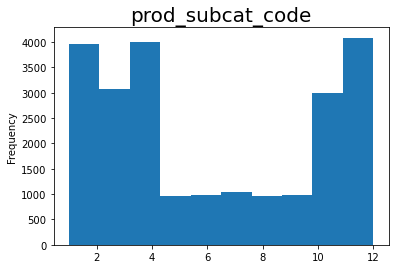

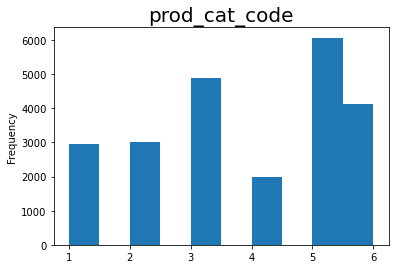

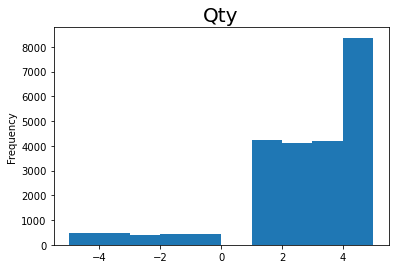

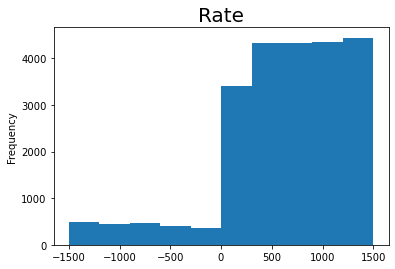

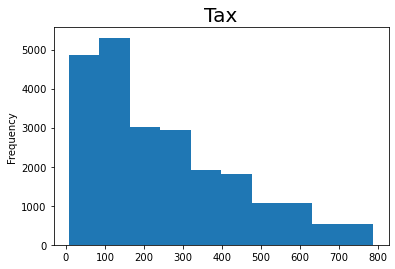

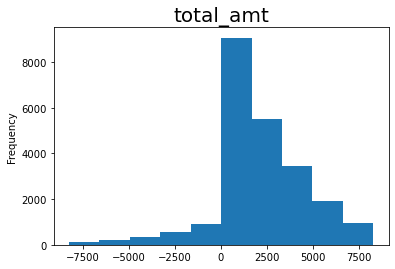

In [20]:
# 3. Generate histograms for all continuous variables.

for i in Customer_final[['prod_subcat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt']] :
    Customer_final[i].plot(kind='hist',fontsize=10)
    plt.title(i,fontsize=20)
    plt.show()


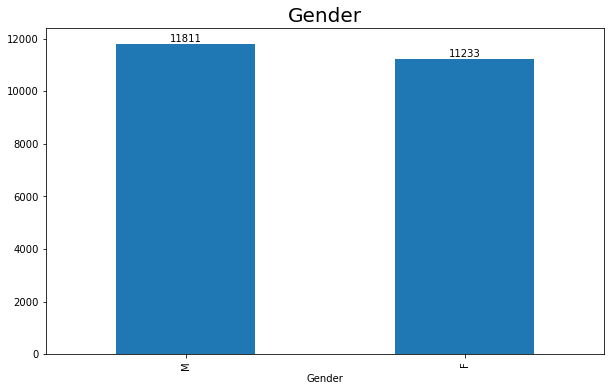

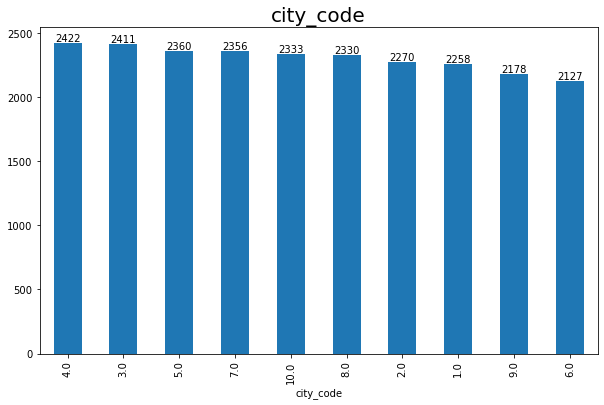

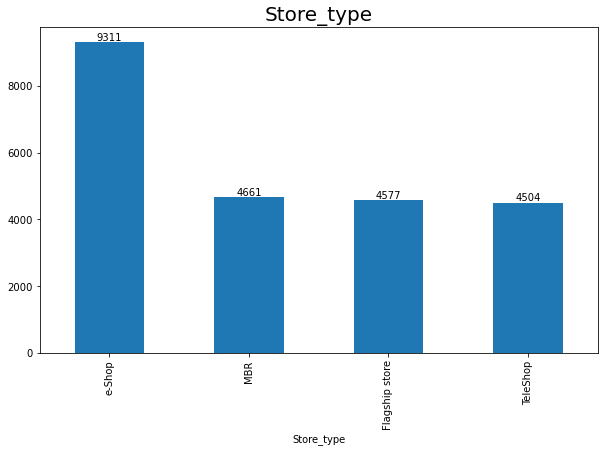

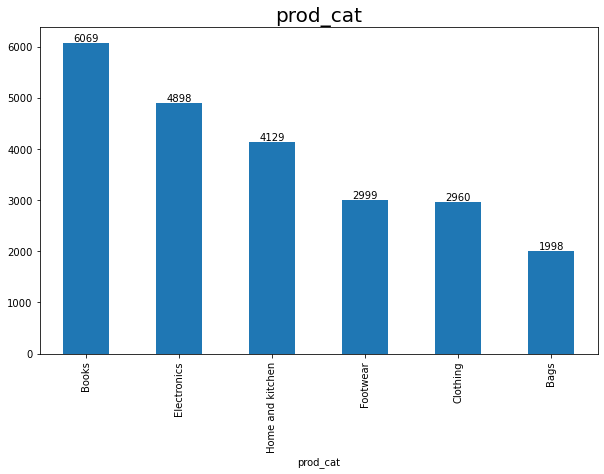

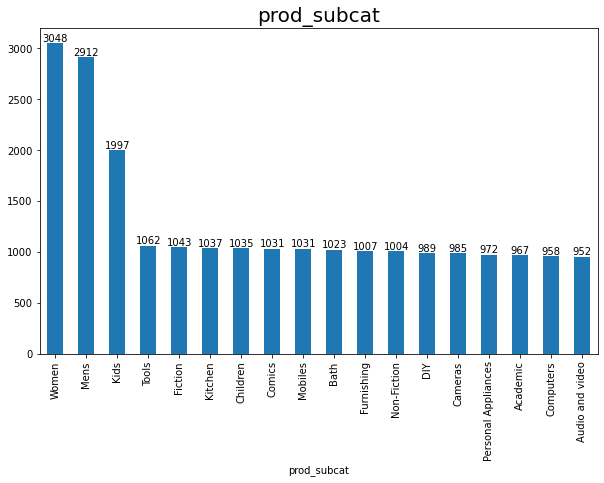

In [21]:
# 3 Generate frequency bars for all categorical variables.

for i in Customer_final[['Gender', 'city_code', 'Store_type', 'prod_cat', 'prod_subcat']] :
    ax=Customer_final.value_counts(i).plot(kind='bar',fontsize=10,figsize=(10,6))
    plt.title(i,fontsize=20)
    plt.bar_label(ax.containers[0])
    plt.show()


In [22]:
#4 a) Time period of the available transaction data
Customer_final.tran_date.max()-Customer_final.tran_date.min()

print ('Time period of the available transaction data is from ' 
       + pd.Timestamp.strftime (Customer_final.tran_date.min() , format='%d-%m-%Y')
       + ' to '
       + pd.Timestamp.strftime(Customer_final.tran_date.max(), format='%d-%m-%Y') 
       +' and differance in days is' )
print (Customer_final.tran_date.max()-Customer_final.tran_date.min())

Time period of the available transaction data is from 02-01-2011 to 02-12-2014 and differance in days is
1430 days 00:00:00


In [23]:
#4 b) Count of transactions where the total amount of transaction was negative.

(Customer_final.total_amt <0).sum()

2177

In [24]:
# 5. Analyze which product categories are more popular among females vs male customers.


prod_pivot=Customer_final.groupby(["Gender","prod_cat"])[['Qty']].sum().sort_values(by='Qty',ascending=False).reset_index()
prod_pivot.pivot(index='Gender', columns='prod_cat', values='Qty')


prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2362,7070,3425,5832,3716,4895
M,2346,7587,3748,6476,3555,5041


In [25]:
#6. Which City code has the maximum customers and what was the percentage of customers from that city?

cust_num=Customer_final.groupby(['city_code'])[['cust_id']].count().sort_values(by='cust_id',ascending=False).reset_index()

cust_per=round(((Customer_final.groupby(['city_code'])[['cust_id']].count()/Customer_final.cust_id.count())*100),2).sort_values(by='cust_id',ascending=False).reset_index()

pd.merge(cust_num,cust_per,on='city_code',suffixes=('_sum','_percentage'))

,city_code,cust_id_sum,cust_id_percentage
0,4.0,2422,10.51
1,3.0,2411,10.46
2,5.0,2360,10.24
3,7.0,2356,10.22
4,10.0,2333,10.12
5,8.0,2330,10.11
6,2.0,2270,9.85
7,1.0,2258,9.79
8,9.0,2178,9.45
9,6.0,2127,9.23


In [26]:
# 7. Which store type sells the maximum products by value and by quantity?
Customer_final.groupby('Store_type')[['Qty','total_amt']].sum().round(2).sort_values(by='Qty',ascending=False)

,Qty,total_amt
Store_type,,
e-Shop,22763,19824816.05
MBR,11194,9674486.06
Flagship store,11133,9715688.19
TeleShop,10984,9364781.07


In [27]:
#8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?


Customer_final[((Customer_final.prod_cat=="Electronics") 
               | (Customer_final.prod_cat=='Clothing')) 
               & (Customer_final.Store_type=='Flagship store')]['total_amt'].sum()


3409559.27

In [28]:
# 9. What was the total amount earned from "Male" customers under the "Electronics" category?

Customer_final[(Customer_final.prod_cat=="Electronics") 
               & (Customer_final.Gender=='M')]['total_amt'].sum().round(2)


5703109.42

In [131]:
# 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

#remove negative amount
postive_trans=unique_trans_count=Customer_final.loc[Customer_final["total_amt"]>0,:]
#unique transactions
uni_trans=postive_trans.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()
#total unique transcation per customer
unique_trans_count=uni_trans.groupby('customer_Id')['transaction_id'].count().reset_index()
# customer transcation more than 10 unique transcations
unique_trans_count[unique_trans_count['transaction_id']>10]


,customer_Id,transaction_id


####### There are NO customer transcation more than 10 unique transcations

In [249]:
# 11. For all customers aged between 25 - 35, find out:
# a. What was the total amount spent for “Electronics” and “Books” product categories?

# user define function to calculate the age
def age(x) :
    current_day=dt.datetime.today().strftime('%d-%m-%Y')
    current_day=pd.to_datetime(current_day)
    age=current_day-x
    age=round((age.days/365.25))
    return age
# adding age colum to Customer_final
Customer_final['AGE']=Customer_final.DOB.apply(age)

# Total amount spent for “Electronics” and “Books” 
Customer_final[((Customer_final.prod_cat=="Electronics") 
               | (Customer_final.prod_cat=='Books')) 
               & ((Customer_final.AGE >=25) & (Customer_final.AGE <=35))]['total_amt'].sum()


6174110.15

In [284]:
# 11 b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

Customer_final[((Customer_final.prod_cat=="Electronics") 
               | (Customer_final.prod_cat=='Books')) 
               & ((Customer_final.AGE >=25) & (Customer_final.AGE <=35))
               & ((Customer_final.tran_date >='2014-01-01') & (Customer_final.tran_date <='2014-03-01'))]['total_amt'].sum().round(2)

174460.72